In [122]:
import sys
sys.path

import librosa
import matplotlib.pyplot as plt
import numpy as np
import json

name = "Will_0_78"
window = (1, 3)
# window = None

y, sr = librosa.load(f'data/recording_{name}.wav')
if window is not None:
    y = y[sr * window[0]:sr * window[1]]
D = librosa.stft(y, n_fft=64, hop_length=32)

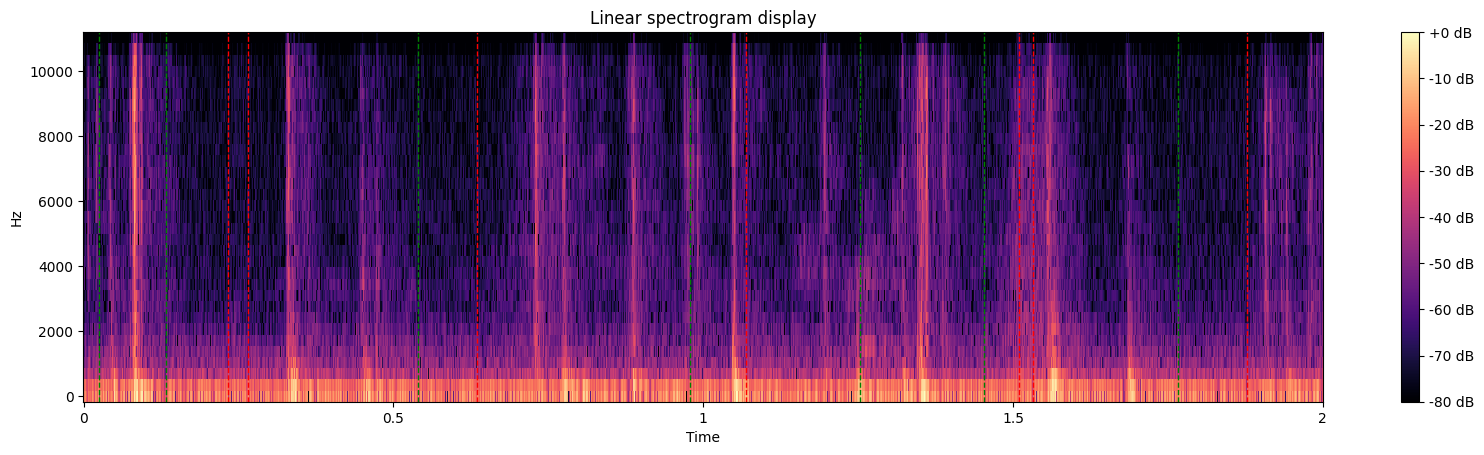

In [123]:
%matplotlib inline

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, y_axis='linear', x_axis='time', ax=ax, sr=sr, hop_length=32)
ax.set(title='Linear spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")
fig.set_figwidth(20)

with open(f'data/events_{name}.json', 'r') as f:
    data = json.load(f)

events = data["events"]
dt = -data["stream_start"] + data["key_start"]
for e in events:
    t = e[1] + dt
    if window is None or (window[0] <= t <= window[1]):
        if window is not None:
            t -= window[0]
        ax.axvline(t, color='r' if e[0] == "keyup" else 'g', linestyle='--', linewidth=1)

plt.interactive(True)
plt.show()

In [124]:
import json

